# Kelompok 4:

1. Braman Tyamahendrawan
2. Krysna Rachmat Ramadhan Budiono
3. Salwa Labibah Canora

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Face Detection**

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
dir = '/content/drive/MyDrive/PCVK/KTM/Kelompok 4/'
files = os.listdir(dir)

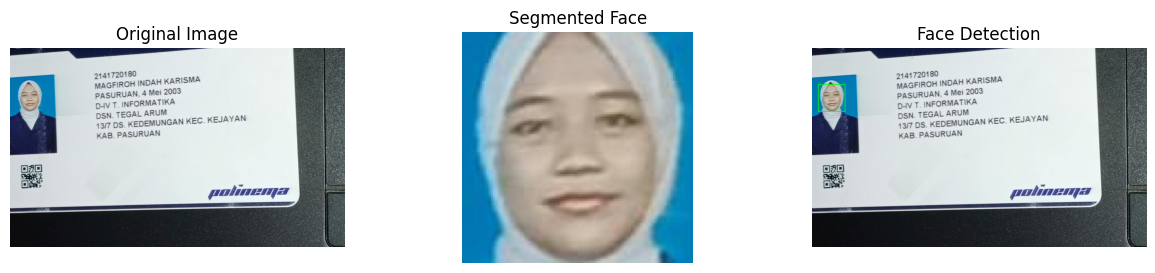

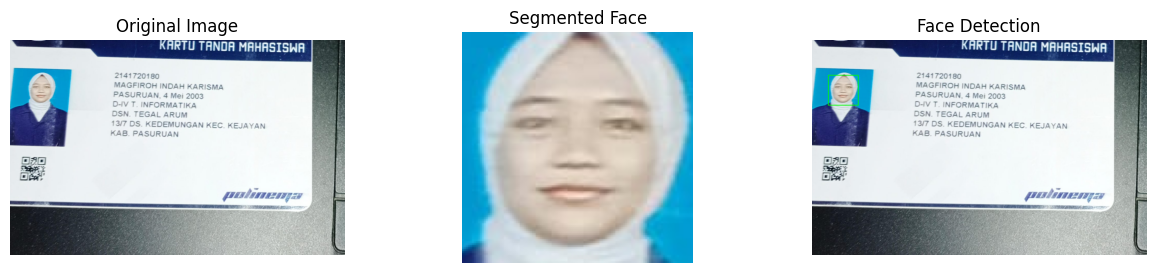

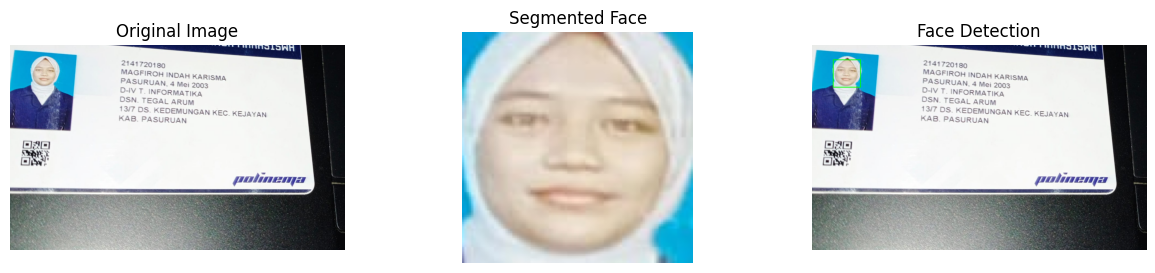

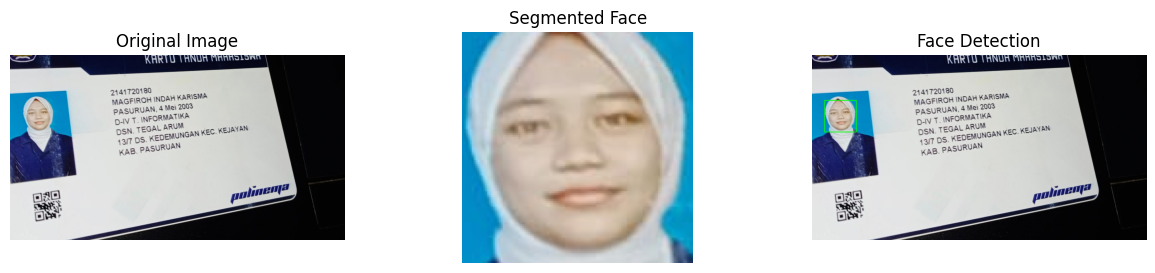

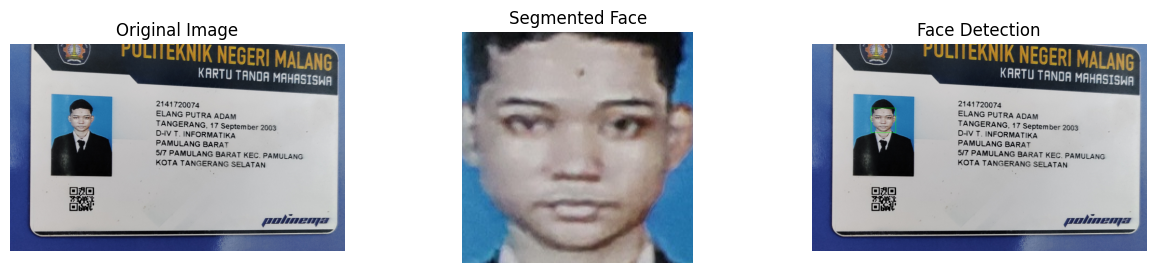

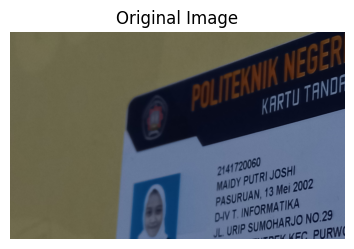

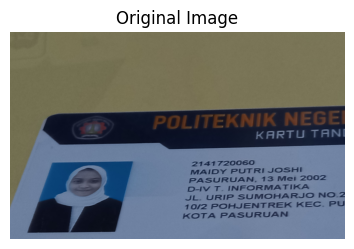

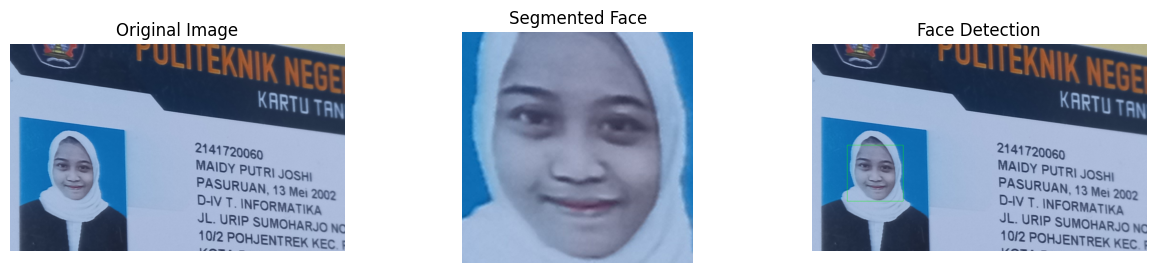

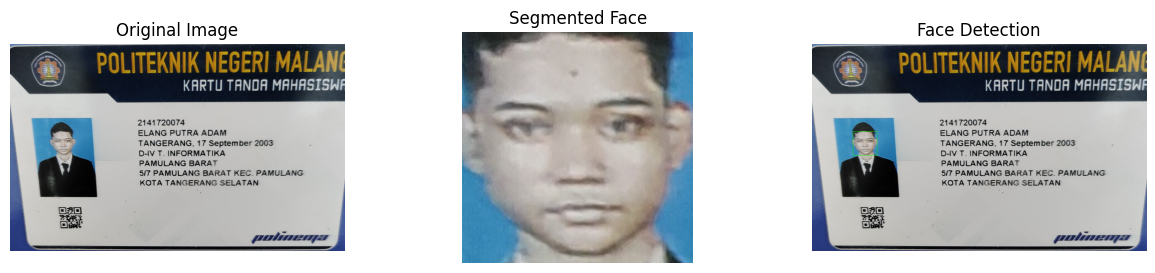

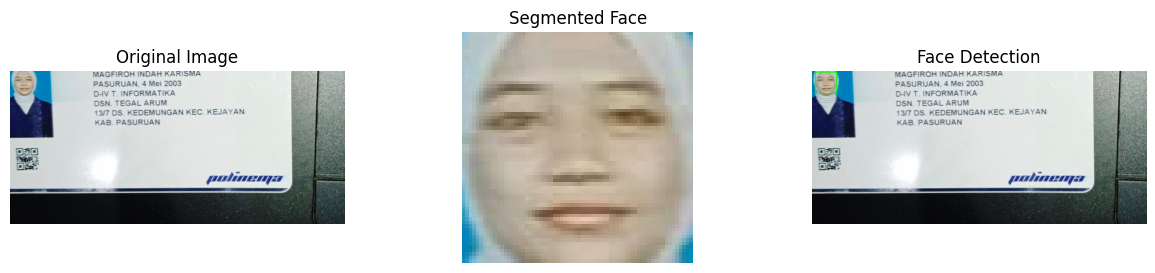

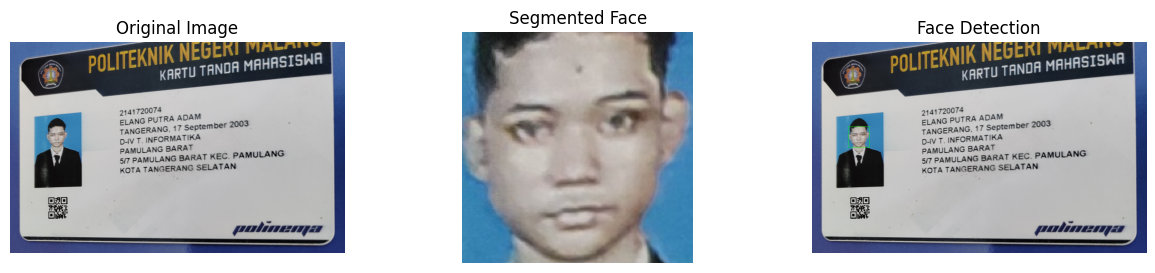

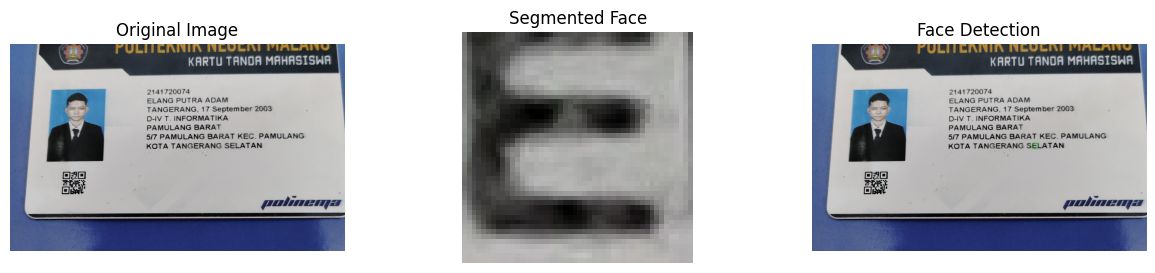

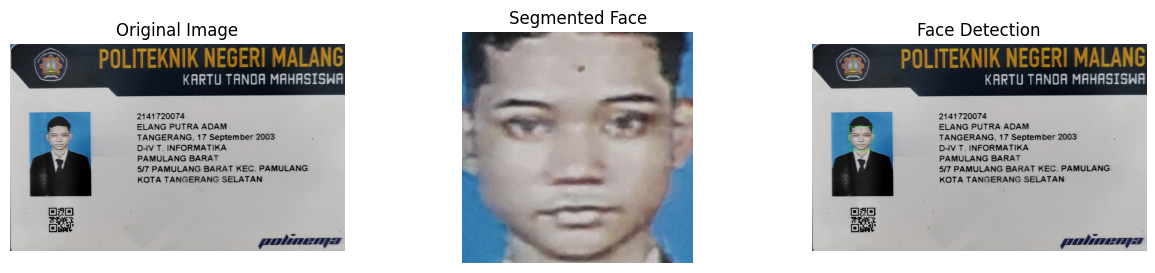

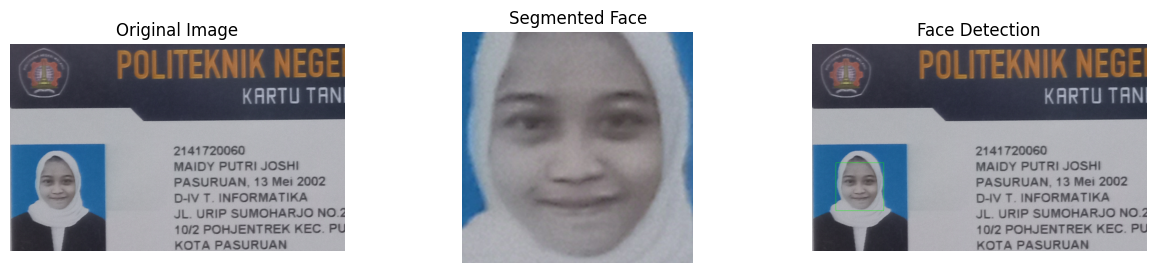

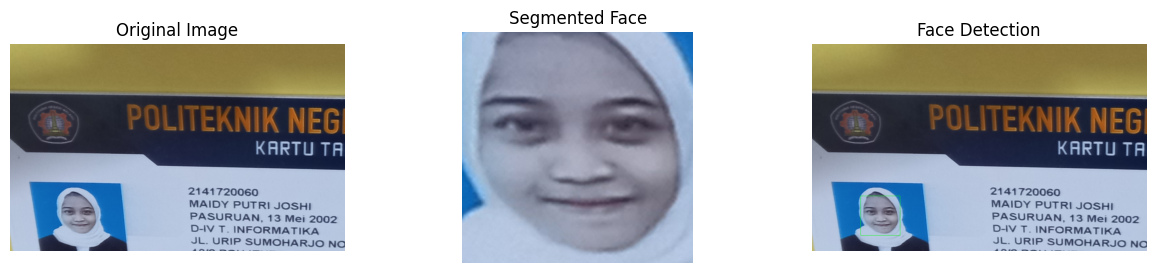

In [ ]:
cascade_face = cv2.CascadeClassifier(
    '/content/drive/MyDrive/PCVK/img/facedet/haarcascades/haarcascade_frontalface_alt.xml')

for i, img_file in enumerate(files, start=1):
    img_path = os.path.join(dir, img_file)
    img = cv2.imread(img_path)

    # PREPROCESSING

    img = img[400:2200, 300:3200]

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel = np.ones((5, 5), np.uint8)
    dilated_img = cv2.dilate(gray_img, kernel, iterations=1)

    # (4) Lokalisasi (Face Detection)
    faces = cascade_face.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Create a single figure for all faces in the image
    plt.figure(figsize=(25, 3))

    # Plot the original image
    plt.subplot(151)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Loop through each face and display the segmented face and detection
    for (x, y, w, h) in faces:
        # (5) Segmentasi (Crop Wajah)
        face_segment = img[y:y+h, x:x+w]

        # Gambar Segmentasi Wajah
        plt.subplot(152)
        plt.imshow(cv2.cvtColor(face_segment, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Face')
        plt.axis('off')

        # Gambar dengan kotak di sekitar wajah (Lokalisasi - Face Detection)
        img_with_boxes = img.copy()
        cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plt.subplot(153)
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Face Detection')
        plt.axis('off')

    # Show the figure after processing all faces in the image
    plt.show()
